## 1.5 Cluster Analysis

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Define the list of columns to drop
cols_to_drop = ['schoolstloc_raw_MA', 'schoolfed_raw_MA', 'schooltot_raw_MA', 'distname', 'schoolname', 'flag_nerds', 'flag_f33', 'gradespan', 'distname_lower', 'schoolname_lower', 'School Name', 'School Code', 'ELA_elem', 'MATH_elem', 'SCI', 'avg_score_elem', 'ELA_hs', 'MATH_hs', 'avg_score_hs', '# in Cohort', '% Graduated', '% Still in School', '% Non-Grad Completers', '% H.S. Equiv.', '% Dropped Out', '% Permanently Excluded', 'Low Income #', 'Low Income %', 'Free Lunch #', 'Free Lunch %', 'Reduced Lunch #', 'Reduced Lunch %', 'nan_flag', 'District Name', 'District Code', 'Salary Totals', 'Average Salary', 'FTE Count_teacher_salary']

# Drop the columns from the dataframe
df_selected = master_df.drop(cols_to_drop, axis=1)
df_selected = df_selected.dropna()
print(df_selected.sample(30))

# standardize the data
df_standardized = (df_selected - df_selected.mean()) / df_selected.std()

# fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
df_selected['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = df_selected.groupby('cluster').mean()

# print the cluster means
print(df_selected)


      ncesenroll  pp_stloc_raw_MA  pp_fed_raw_MA  pp_total_raw_MA   avg_score  \
484        614.0     14617.883398     239.225872     14857.109270  503.966667   
716       1340.0     18499.274631     306.063993     18805.338624  506.300000   
168        495.0     13089.625673     227.613631     13317.239304  502.633333   
570        370.0     14684.424997     135.011130     14819.436127  497.533333   
892        849.0     13654.317166     177.665572     13831.982738  512.200000   
1073       509.0     15533.793929     395.035866     15928.829795  504.466667   
1304       357.0     17844.438958     183.660382     18028.099340  514.166667   
84         322.0     17632.019705    1446.361217     19078.380922  496.150000   
476        563.0     16636.171976      48.993279     16685.165256  518.850000   
202        705.0     15890.544031     377.415097     16267.959128  511.700000   
1222       549.0     17520.810324      89.223816     17610.034140  502.666667   
626        506.0     13464.8

/var/folders/p3/2rl3dn4n7r1d7y2w809_2sdm0000gn/T/ipykernel_14954/196480018.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_standardized = (df_selected - df_selected.mean()) / df_selected.std()
/var/folders/p3/2rl3dn4n7r1d7y2w809_2sdm0000gn/T/ipykernel_14954/196480018.py:13: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_standardized = (df_selected - df_selected.mean()) / df_selected.std()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Define the list of columns to drop
cols_to_drop = ['schoolstloc_raw_MA', 'schoolfed_raw_MA', 'schooltot_raw_MA', 'distname', 'schoolname', 'flag_nerds', 'flag_f33', 'gradespan', 'distname_lower', 'schoolname_lower', 'School Name', 'School Code', 'ELA_elem', 'MATH_elem', 'SCI', 'avg_score_elem', 'ELA_hs', 'MATH_hs', 'avg_score_hs', '# in Cohort', '% Graduated', '% Still in School', '% Non-Grad Completers', '% H.S. Equiv.', '% Dropped Out', '% Permanently Excluded', 'Low Income #', 'Low Income %', 'Free Lunch #', 'Free Lunch %', 'Reduced Lunch #', 'Reduced Lunch %', 'nan_flag', 'District Name', 'District Code', 'Salary Totals', 'Average Salary', 'Avg_Salary_Int', 'FTE Count_teacher_salary', 'First Language Not English #', 'High Needs #', 'Economically Disadvantaged #', 'First Language Not English %']

# Drop the columns from the dataframe
X = master_df.drop(cols_to_drop, axis=1)
# X = df_selected.dropna()
X

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


ValueError: could not convert string to float: '   1,109'

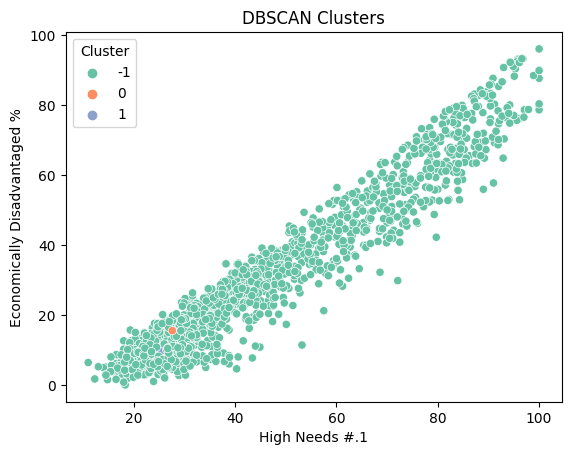

In [ ]:
from sklearn.cluster import DBSCAN

# Select the features to cluster on
X = master_df[['High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']]

# Create the DBSCAN object and fit the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Get the labels for each point
labels = dbscan.labels_

# Add the labels to the original dataframe
df['Cluster'] = labels


import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot of two of the features
sns.scatterplot(x='High Needs #.1', y='Economically Disadvantaged %', hue='Cluster', data=df, palette='Set2')

# Add axis labels and a title
plt.xlabel('High Needs #.1')
plt.ylabel('Economically Disadvantaged %')
plt.title('DBSCAN Clusters')

# Display the plot
plt.show()
